# Credit Card Default Prediction

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing billing details and receive a categorical (yes or no) output indicating if the customer defaults to using their credit card.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Store CSV file in variable 
data = r'..\..\data\default_of_credit_card_clients_v2.xls'
# Read CSV file in pandas dataframe 
df = pd.read_excel(data)

In [5]:
# Print dataframe to confirm successful loading
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Column Meanings 

**LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**SEX**: Gender (1 = male; 2 = female).

**EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others).

**AGE**: Age (year).

**PAY_0** - **PAY_6**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: *PAY_0* = the repayment status in September, 2005; *PAY_2* = the repayment status in August, 2005; . . .;*PAY_6* = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**BILL_AMT1** - **BILL_AMT6**: Amount of bill statement (NT dollar). *BILL_AMT1* = amount of bill statement in September, 2005; *BILL_AMT2* = amount of bill statement in August, 2005; . . .; *BILL_AMT6* = amount of bill statement in April, 2005.

**PAY_AMT1** - **PAY_AMT6**: Amount of previous payment (NT dollar). *PAY_AMT1* = amount paid in September, 2005; *PAY_AMT2* = amount paid in August, 2005; . . .;*PAY_AMT6* = amount paid in April, 2005.

### <font color='red'>Target Variable: default_payment_next_month</font>

## Week 1: Data Cleaning and Analysis 

### Data Cleaning

In [9]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Print dataframe to confirm 
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
# Rename columns 
df.rename(columns={'pay_0':'sept_repayment', 'pay_2':'aug_repayment', 'pay_3':'jul_repayment', 'pay_4':'jun_repayment',
                    'pay_5':'may_repayment', 'pay_6':'apr_repayment', 
                    'bill_amt1':'sept_bill', 'bill_amt2':'aug_bill', 'bill_amt3':'jul_bill', 'bill_amt4':'jun_bill',
                    'bill_amt5':'may_bill', 'bill_amt6':'apr_bill',
                    'pay_amt1':'sept_paid', 'pay_amt2':'aug_paid', 'pay_amt3':'jul_paid', 'pay_amt4':'jun_paid', 
                    'pay_amt5':'may_paid', 'pay_amt6':'apr_paid'}, inplace=True)

# Print dataframe for renamed columns
df

,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,jul_repayment,jun_repayment,...,jun_bill,may_bill,apr_bill,sept_paid,aug_paid,jul_paid,jun_paid,may_paid,apr_paid,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**Check columns in correct format with Dtype**

In [12]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          30000 non-null  int64
 1   limit_bal                   30000 non-null  int64
 2   sex                         30000 non-null  int64
 3   education                   30000 non-null  int64
 4   marriage                    30000 non-null  int64
 5   age                         30000 non-null  int64
 6   sept_repayment              30000 non-null  int64
 7   aug_repayment               30000 non-null  int64
 8   jul_repayment               30000 non-null  int64
 9   jun_repayment               30000 non-null  int64
 10  may_repayment               30000 non-null  int64
 11  apr_repayment               30000 non-null  int64
 12  sept_bill                   30000 non-null  int64
 13  aug_bill                    30000 non-null  int64
 14  jul_bi

**Check for NULL and Duplicate values**

In [14]:
# Check for missing values
print(df.isnull().sum())

id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
sept_repayment                0
aug_repayment                 0
jul_repayment                 0
jun_repayment                 0
may_repayment                 0
apr_repayment                 0
sept_bill                     0
aug_bill                      0
jul_bill                      0
jun_bill                      0
may_bill                      0
apr_bill                      0
sept_paid                     0
aug_paid                      0
jul_paid                      0
jun_paid                      0
may_paid                      0
apr_paid                      0
default_payment_next_month    0
dtype: int64


In [15]:
# Check for dupicate entries 
df[df.duplicated()]

,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,jul_repayment,jun_repayment,...,jun_bill,may_bill,apr_bill,sept_paid,aug_paid,jul_paid,jun_paid,may_paid,apr_paid,default_payment_next_month


**Remove Columns to Avoid Any Biases and Imbalance**

In [36]:
# Will have information leakage from the following columns 
df.drop(['id', 'limit_bal'], axis=1, inplace=True)

print('Columns remaining: ', df.shape[1])

Columns remaining:  23


### Exploratory Data Analysis

In [39]:
# View dataset
df

,sex,education,marriage,age,sept_repayment,aug_repayment,jul_repayment,jun_repayment,may_repayment,apr_repayment,...,jun_bill,may_bill,apr_bill,sept_paid,aug_paid,jul_paid,jun_paid,may_paid,apr_paid,default_payment_next_month
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,39,0,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,1,3,2,43,-1,-1,-1,-1,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,1,2,2,37,4,3,2,-1,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,1,3,1,41,1,-1,0,0,0,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**How many used credit cards?**

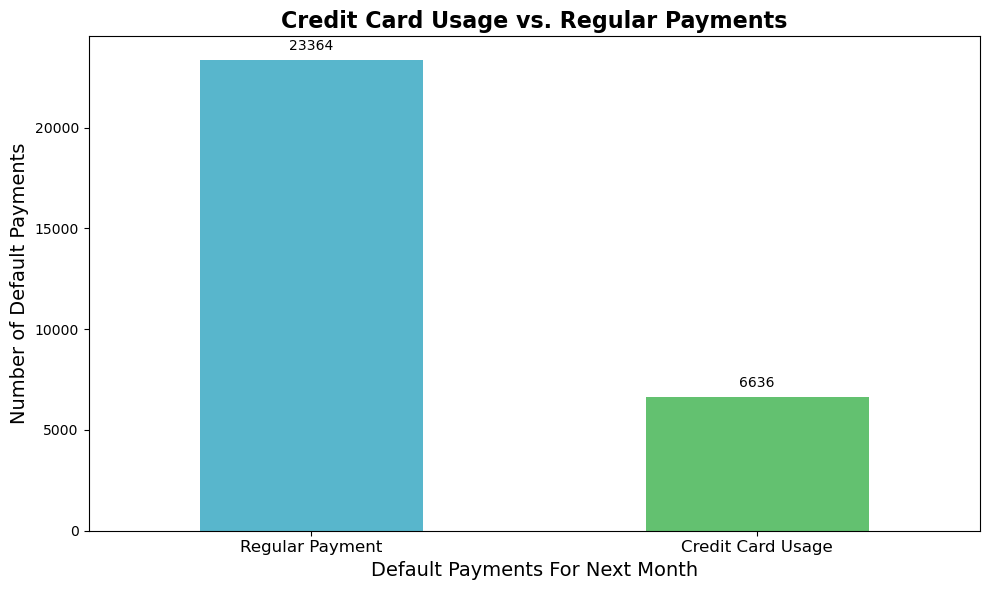

default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64


In [84]:
# Count the occurrences of flight delays
default_counts = df['default_payment_next_month'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = default_counts.plot(kind='bar', color=['#58B6CC','#63C170'])

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Default Payments For Next Month', fontsize=14)
plt.ylabel('Number of Default Payments', fontsize=14)
plt.title('Credit Card Usage vs. Regular Payments', fontsize=16, fontweight='bold')
plt.xticks(ticks=[0, 1], rotation=0, labels=['Regular Payment', 'Credit Card Usage'], ha='center', fontsize=12)  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['default_payment_next_month'].value_counts()/df.shape[0]) * 100)

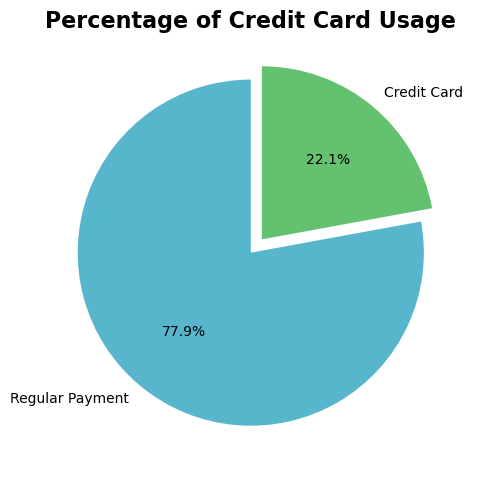

In [90]:
# Visualizing Delayed Flight Percentage

# Extract total number of regular payments and credit card payments
payment, creditCard = df['default_payment_next_month'].value_counts()

# Data and Labels
data = [payment, creditCard]
keys = ['Regular Payment', 'Credit Card']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1], 
    colors=['#58B6CC','#63C170']
)

# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Credit Card Usage', fontsize=16, fontweight='bold')
plt.tight_layout()

# Display the plot
plt.show()

The following dataset clearly shows imbalance that we will take care off later. 

## Week 2 & 3: Feature Engineering and Model Selection

## Week 4: Deployment